In [12]:
import pyodbc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
%matplotlib inline

In [1]:
# Connection string and query.

con = pyodbc.connect('Trusted_Connection=yes', driver = '{SQL Server}',server = 'smc-sql-2014,1434\phi ', database = 'DataBridge_Ben')

cur = con.cursor()

querystring = "SELECT * FROM BBABBS_ModelingDataSet"

cur.execute(querystring)

result_set = cur.fetchall()

In [3]:
# Use pandas to insert directly into a pandas dataframe
df_MDS = pd.read_sql(querystring,con)

In [7]:
# View overall shape and counts of most variables.
df_MDS.describe(percentiles=[.01,.05,.10,.25,.50,.75,.90,.95,.99])

,PersonID,DateMonthlyKey,PersonHistoryID,Age,PersonAnnualIncome,PersonFPL,PrimaryLanguageID,SecondLanguageID,EducationID,MaritalStatusID,...,DwellingTypeID,HousingTypeID,HHVulnerabilityTypeID,HHHeatingTypeID,AgeBracketID,CntChildInHousehold,CntRelativeInHousehold,CntGrandchildInHousehold,CntNonRelativeInHousehold,CntFosterChildInHousehold
count,347285.000000,347285.000000,347285.000000,347285.000000,97179.000000,39730.000000,328191.000000,37984.000000,342706.000000,346019.000000,...,175125.000000,175125.000000,91739.000000,174386.000000,347249.000000,347285.000000,347285.000000,347285.000000,347285.000000,347285.000000
mean,95264.561179,95.248623,157984.027274,36.044059,16874.251919,140.213139,2.118721,3.385768,4.820928,3.863421,...,5.281804,4.686384,2.920285,7.494650,4.794591,0.932318,0.011074,0.003994,0.075036,0.001103
std,56885.860572,24.015581,88914.755934,24.075838,11973.901124,119.431019,2.323576,2.881225,2.040183,2.907302,...,3.411197,0.963726,1.846003,2.826721,2.039798,1.378086,0.137997,0.085006,0.368700,0.048312
min,1.000000,2.000000,1.000000,-34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1610.000000,49.000000,2671.000000,1.000000,1386.000000,10.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,8207.000000,49.000000,13908.000000,4.000000,3276.450000,21.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,16545.000000,49.000000,28409.000000,7.000000,5664.000000,36.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45137.000000,77.000000,81350.000000,16.000000,8820.000000,71.000000,1.000000,1.000000,3.000000,1.000000,...,2.000000,4.000000,1.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95839.000000,111.000000,169872.000000,32.000000,14376.000000,111.000000,1.000000,1.000000,5.000000,2.000000,...,6.000000,5.000000,2.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,146074.000000,111.000000,241379.000000,53.000000,21916.395000,185.000000,1.000000,7.000000,7.000000,7.000000,...,9.000000,5.000000,5.000000,9.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000


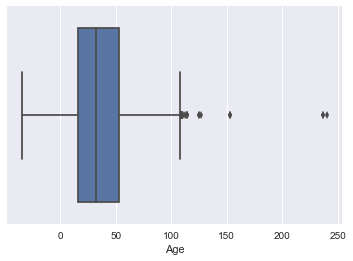

In [16]:
# Box and whisker plot for Age variable.
sb.boxplot(df_MDS['Age']);

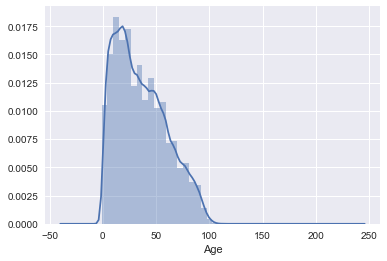

In [33]:
# Histogram plot for Age variable.
sb.distplot(df_MDS['Age']);

In [30]:
# Get list of ages less than 0.
print(df_MDS[df_MDS.Age < 0])

        PersonID  DateMonthlyKey  PersonHistoryID  BirthDate  Age  Is5OrUnder  \
187639    116568              86           116568 2017-01-04   -2        True   
201520    116568              49           116568 2017-01-04   -5        True   
217912    151793              78           151793 2014-10-26   -1        True   
218183    152285              66           152285 2013-07-09   -1        True   
243407    147797              68           147797 2013-12-30   -1        True   
260614    154924              55           154924 2014-12-09   -3        True   
260615    154924              67           154924 2014-12-09   -2        True   
261411    156657              91           156657 2031-06-09  -16        True   
261412    156657             111           156657 2031-06-09  -15        True   
262176    158316              77           158316 2015-03-26   -1        True   
265671    166251              97           166251 2019-08-19   -4        True   
265672    166251            

In [48]:
# Convert all possible columns to int, ignore if not int.
df_MDS = df_MDS.apply(pd.to_numeric, errors='ignore')

In [55]:
# Histogram plot for PrimaryLanguageID variable.
df_MDS['PrimaryLanguageID'].fillna(value = 0, inplace = True)

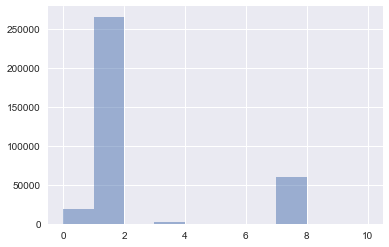

In [94]:
plt.hist(df_MDS['PrimaryLanguageID'], histtype='bar', alpha=.5);

In [57]:
# Grab another 
querystring2 = "SELECT * FROM ref_Language"
cur.execute(querystring2)

result_set2 = cur.fetchall()


In [58]:
result_set2

[(1, 'English'),
 (2, 'Russian'),
 (3, 'Other'),
 (4, 'French'),
 (5, 'Italian'),
 (6, 'Polish'),
 (7, 'Spanish'),
 (8, 'Portuguese'),
 (9, 'Vietnamese'),
 (10, 'German'),
 (11, 'Undeclared')]

In [98]:
# Get Count of any categorical with group by
df_MDS.groupby(['PrimaryLanguageID', 'DateMonthlyKey']).count()

PersonID  PersonHistoryID  BirthDate  Age  \
PrimaryLanguageID DateMonthlyKey                                              
0.0               2                      1                1          1    1   
                  3                      1                1          1    1   
                  4                      1                1          1    1   
                  5                      1                1          1    1   
                  6                      1                1          1    1   
                  7                      1                1          1    1   
                  8                      1                1          1    1   
                  9                      2                2          2    2   
                  10                     1                1          1    1   
                  11                     1                1          1    1   
                  12                     4                4          4    4   
                  13                     4                4          4    4   
                  14                     4                4          4    4   
                  15                     3                3          3    3   
                  16                     3                3          3    3   
                  17                     5                5          5    5   
                  18                     5                5          5    5   
                  19                     4                4          4    4   
                  20                     4                4          4    4   
                  21                     6                6          6    6   
                  22                     6                6          6    6   
                  23                     5                5          5    5   
                  24                     7                7          7    7   
                  25                     8                8          8    8   
                  26                     7                7          7    7   
                  27                     9                9          9    9   
                  28                     7                7          7    7   
                  29                     8                8          8    8   
                  30                     7                7          7    7   
                  31                     8                8          8    8   
...                                    ...              ...        ...  ...   
10.0              56                     1                1          1    1   
                  58                     1                1          1    1   
                  59                     1                1          1    1   
                  61                     2                2          2    2   
                  63                     2                2          2    2   
                  65                     1                1          1    1   
                  68                     2                2          2    2   
                  69                     1                1          1    1   
                  70                     2                2          2    2   
                  71                     2                2          2    2   
                  72                     1                1          1    1   
                  73                     2                2          2    2   
                  74                     1                1          1    1   
                  75                     1                1          1    1   
                  77                     1                1          1    1   
                  87                     1                1          1    1   
                  91                     1                1          1    1   
                  93                     1                1          1    1   
     